In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D ,Dense , MaxPooling2D
from tensorflow.keras.activations import relu , softmax
from tensorflow.keras.utils import normalize


mnist =  tf.keras.datasets.mnist
(x_train , y_train) , (x_test , y_test) =  mnist.load_data()

### Median & Gaussian Filters

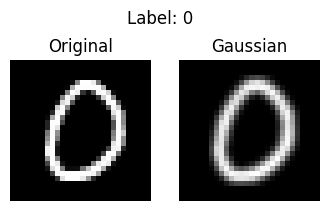

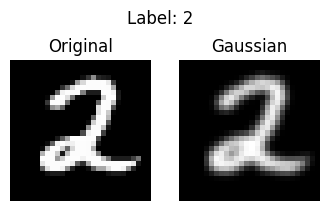

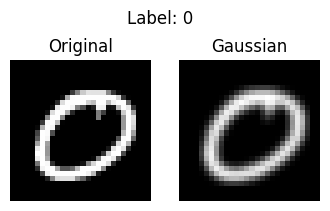

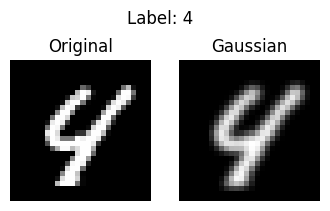

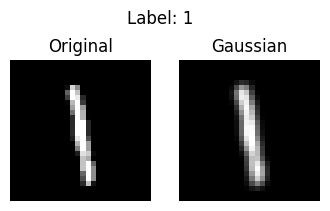

In [90]:
random_samples = np.random.choice(len(x_train) , size = 5 , replace = False)

for i in random_samples:
    img = x_train[i]
    

    denoised = cv2.medianBlur(img , ksize=3)
    guassian = cv2.GaussianBlur(img , ksize=(3,3) , sigmaX=0)
    plt.figure(figsize=(4,2.5))
    plt.subplot(1,2,1) , plt.title("Original") , plt.axis('off') , plt.imshow(img , cmap='gray')
    plt.subplot(1,2,2) , plt.title("Gaussian") , plt.axis('off') , plt.imshow(guassian , cmap='gray')
    
    plt.suptitle(f"Label: {y_train[i]}")
    plt.show()
    

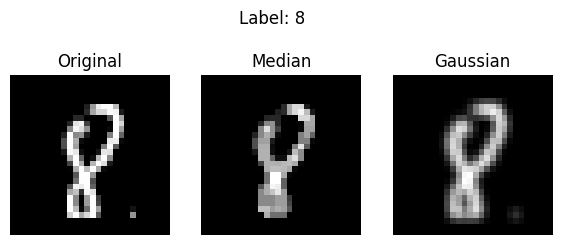

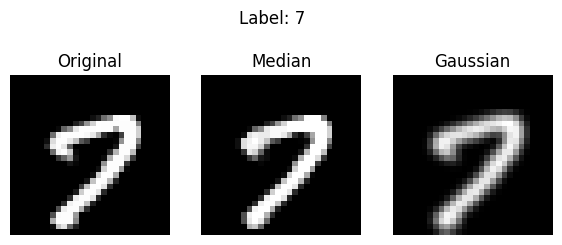

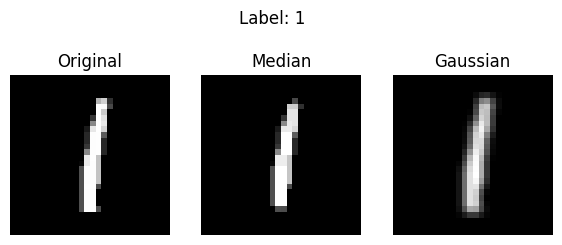

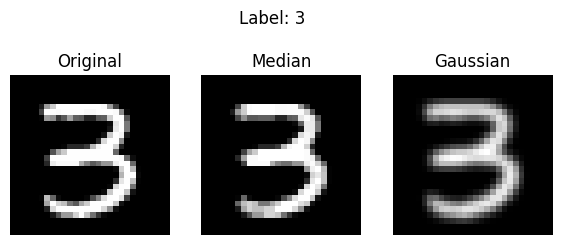

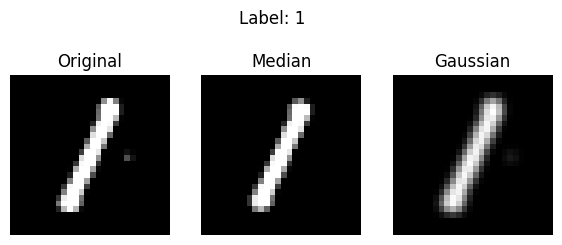

In [72]:
random_samples = np.random.choice(len(x_train) , size = 5 , replace = False)

for i in random_samples:
    img = x_train[i]
    if img.ndim == 3 and img.shape[-1] == 1:
        img = img.squeeze(-1)
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)

    denoised = cv2.medianBlur(img , ksize=3)
    guassian = cv2.GaussianBlur(img , ksize=(3,3) , sigmaX=0)
    plt.figure(figsize=(7,3))
    plt.subplot(1,3,1) , plt.title("Original") , plt.axis('off') , plt.imshow(img , cmap='gray')
    plt.subplot(1,3,2) , plt.title("Median") , plt.axis('off') , plt.imshow(denoised , cmap='gray')
    plt.subplot(1,3,3) , plt.title("Gaussian") , plt.axis('off') , plt.imshow(guassian , cmap='gray')
    
    plt.suptitle(f"Label: {y_train[i]}")
    plt.show()
    

In [75]:
def guass_filter (img):
    return cv2.GaussianBlur(img , ksize=(3,3) , sigmaX=0)

# vectorize
x_train_g = np.array([guass_filter(img) for img in x_train])
x_test_g = np.array([guass_filter(img) for img in x_test])

# Normalize and add one dimension (n , 28 , 28 , 1)
x_train_g = (x_train_g.astype('float32') / 255.)[..., np.newaxis]
x_test_g = (x_test_g.astype('float32') / 255.)[... , np.newaxis]

### CNN Model

In [77]:
model = Sequential([
    Conv2D(32 , 3 , activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(64 , 3 , activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(10 , activation='softmax')
    ])

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_g , y_train , validation_split=0.1 , epochs = 5 , batch_size=128)

test_loss , test_acc = model.evaluate(x_test_g , y_test , verbose=0)
print(f"\n Test accuracy on Gaussian filtered digits : {test_acc : .4f} ")
print(f"\n Test Loss on Gaussian filtered digits : {test_loss : .4f} ")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8382 - loss: 0.5432 - val_accuracy: 0.9752 - val_loss: 0.0812
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9777 - loss: 0.0758 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9848 - loss: 0.0505 - val_accuracy: 0.9865 - val_loss: 0.0482
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9888 - val_loss: 0.0387

 Test accuracy on Gaussian filtered digits :  0.9869 

 Test Loss on Gaussian filtered digits :  0.0379 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


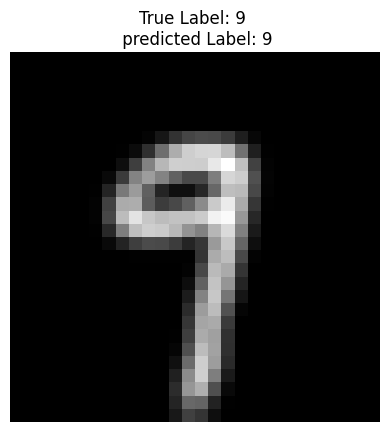

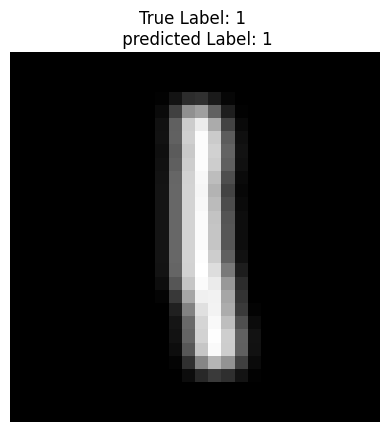

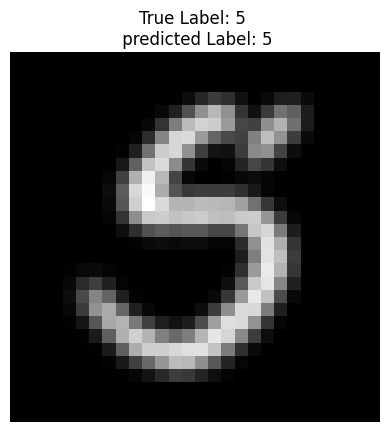

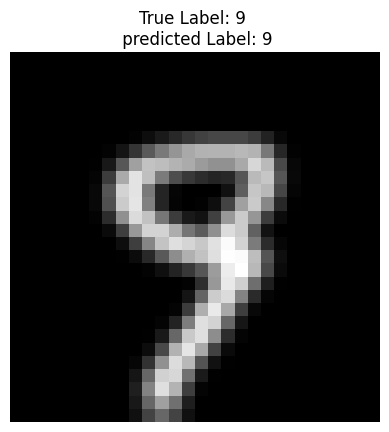

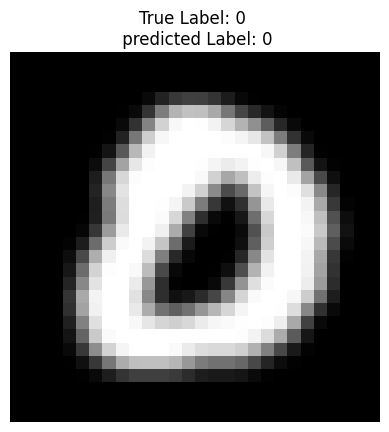

In [92]:
random_test_samples = np.random.choice(len(x_test_g) , size = 5 , replace = False)
predict = model.predict(x_test_g[random_test_samples])
for i , p in zip(random_test_samples,predict):
    plt.imshow(x_test_g[i].squeeze() , cmap='gray')
    plt.title(f"True Label: {y_test[i]} \n predicted Label: {np.argmax(p)}")
    plt.axis('off')
    plt.show()


In [84]:
model.save('Mnist_Gaussian_model.keras')
print("\n Model saved ✅")


 Model saved ✅
